In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_predict, GridSearchCV
import statsmodels.api as sm
from scipy import stats
import pandas as pd
import numpy as np
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")

# Model fitting

Next step, I'll try fitting a few models to the data to see which one yields the most accurate predictions.In this notebook we'll try the below models:
- Multi-linear Regression (With Feature Selection and Lasso and Ridge Corrections).
- Random Forest Regression.
- Custom Model using keras

In [23]:
#Reading in the table
df = pd.read_csv('./Interim Data/cleaned_train.csv').drop('index',axis=1)
df.head()

,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe,MSSubClass,...,ExMaterial,NumBsmtFinType,Bsmt_ALQ_Area,Bsmt_BLQ_Area,Bsmt_GLQ_Area,Bsmt_LwQ_Area,Bsmt_Rec_Area,IsAvgGCond,IsAvgGQual,AvgRmSize
0,1,0,0,0,0,0,0,0,0,60,...,VinylSd,2,0.0,0.0,706.0,0.0,0.0,True,True,213.750000
1,0,1,0,0,0,0,0,0,0,20,...,MetalSd,2,978.0,0.0,0.0,0.0,0.0,True,True,210.333333
2,1,0,0,0,0,0,0,0,0,60,...,VinylSd,2,0.0,0.0,486.0,0.0,0.0,True,True,297.666667
3,1,0,0,0,0,0,0,0,0,70,...,Wd Shng+Wd Sdng,2,216.0,0.0,0.0,0.0,0.0,True,True,245.285714
4,1,0,0,0,0,0,0,0,0,60,...,VinylSd,2,0.0,0.0,655.0,0.0,0.0,True,True,244.222222


In [24]:
# X and y creation
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

# Linear Regression

### Original

I am using mean absolute error as the metric here because 1) Mean absolute error weighs all errors similarly, which suits us here since we don't need to penalize large errors beyond their value. For example: an error of 1000 is twice as bad as an error of 500, and only twice as bad. 2) R^2 isn't as interpretable as MAE in terms of preictive power, and can make the model prone to overfitting.

First, let's run a Linear Regression model on the data as it is after the EDA process in the other notebook. This can help provide us with a baseline to compare the other models against.

In [25]:
X = pd.get_dummies(X).astype('float64')
X.head()

,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe,MSSubClass,...,ExMaterial_Wd Sdng+VinylSd,ExMaterial_Wd Sdng+WdShing,ExMaterial_Wd Shng+BrkFace,ExMaterial_Wd Shng+CemntBd,ExMaterial_Wd Shng+HdBoard,ExMaterial_Wd Shng+MetalSd,ExMaterial_Wd Shng+Stucco,ExMaterial_Wd Shng+VinylSd,ExMaterial_Wd Shng+Wd Sdng,ExMaterial_Wd Shng+WdShing
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
len(X.columns)

281

In [27]:
import statsmodels.api as sm

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     57.28
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        03:16:44   Log-Likelihood:                -16680.
No. Observations:                1460   AIC:                         3.386e+04
Df Residuals:                    1209   BIC:                         3.519e+04
Df Model:                         250                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Norm                

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
y_pred = cross_val_predict(reg, X, y, cv=5)
mean_absolute_error(y_pred, y)

19472.267679783316

From the above OLS result, we have the following information:
* Prob (F-statistic): it is very small, so that means that our model is overall significant.
* Omnibus / Prob (Omnibus): the residuals are not distributed normally and are skewed.
* We have a lot of parameters that aren't significant based on the T-test, though we have to keep in mind with such a large nubmer of parameters Type I and Type II errors are going to happen.
* Both AIC and BIC are large, meaning that there are redundant variables.

Since there are some issues with the residual distribution according to the OLS report, we'll check that the 4 assumptions of Linear Regression are met:
* Normal Residuals.
* Constant Variance across different Y values.
* Independence - assumed since large sample.
* No Heteroscedacity.

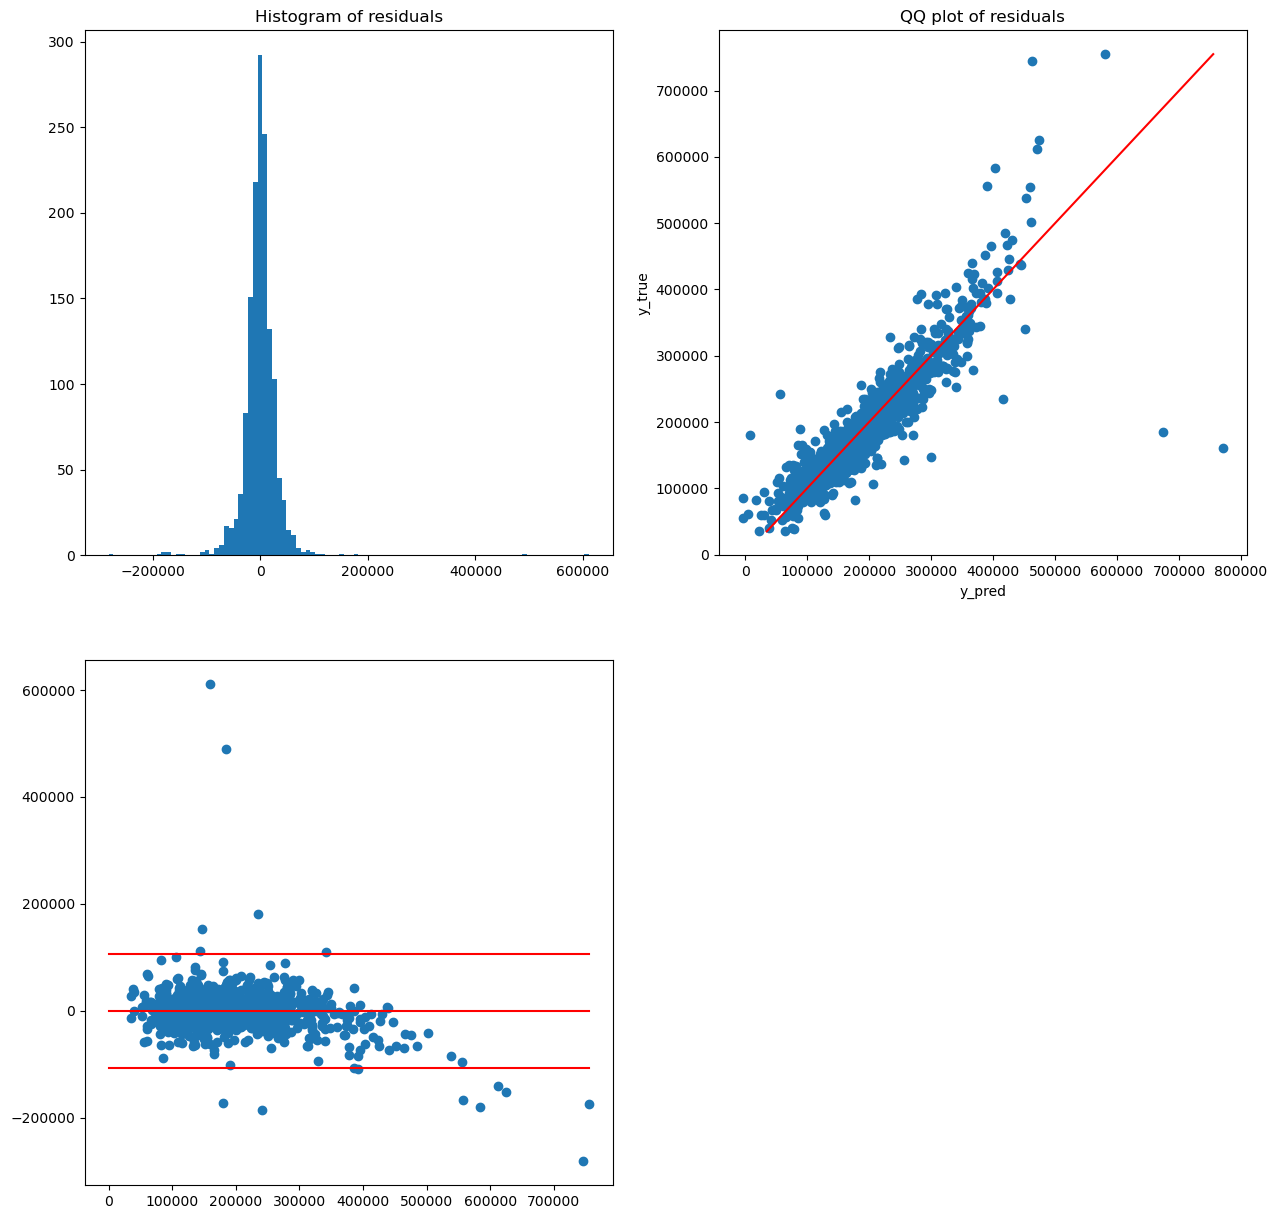

In [29]:
#Check normal distribution of Residuals
import matplotlib.pyplot as plt

def test_linreg(y_pred, y):
    residuals = y_pred - y

    fig = plt.figure(figsize=(15,15))
    #histogram
    ax1 = plt.subplot(2,2,1)
    ax1.hist(residuals, bins=100)
    ax1.set_title('Histogram of residuals')

    #qq plot
    ax2 = plt.subplot(2,2,2)
    ax2.scatter(y_pred,y)
    ax2.plot([min(y),max(y)],[min(y),max(y)], color='red')
    ax2.set_title('QQ plot of residuals')
    ax2.set_ylabel('y_true')
    ax2.set_xlabel('y_pred')

    #Heteroscedasity test
    ax3 = plt.subplot(2,2,3)
    ax3.scatter(y, residuals)
    ax3.plot([0,max(y)],[0,0], color='red')
    ax3.plot([0,max(y)],[-3*residuals.std(),-3*residuals.std()], color='red')
    ax3.plot([0,max(y)],[3*residuals.std(),3*residuals.std()], color='red')
    plt.show()
    
    return residuals
    
residuals = test_linreg(y_pred, y)

The residuals mostly follow a bell curve and the QQ plot appears to have a slope of 1. However, the residuals are skewed to the right, and there are several outliers. 

In [30]:
(residuals.quantile(0.975) - residuals.quantile(0.025))/residuals.std()

3.179247434510342

### Log the Target

Let's try training the Linear Regression with the log of the SalePrice, and exponentiate the output. Based on the results shown below, it looks like logging the SalePrice yields a lower mean absolute error and better conformity with the assumptions of linear regression.

In [31]:
reg = LinearRegression()
y_log = np.log(y)
y_pred = cross_val_predict(reg, X, y_log, cv=5)
mean_absolute_error(np.exp(y_pred), y)

16886.762157003006

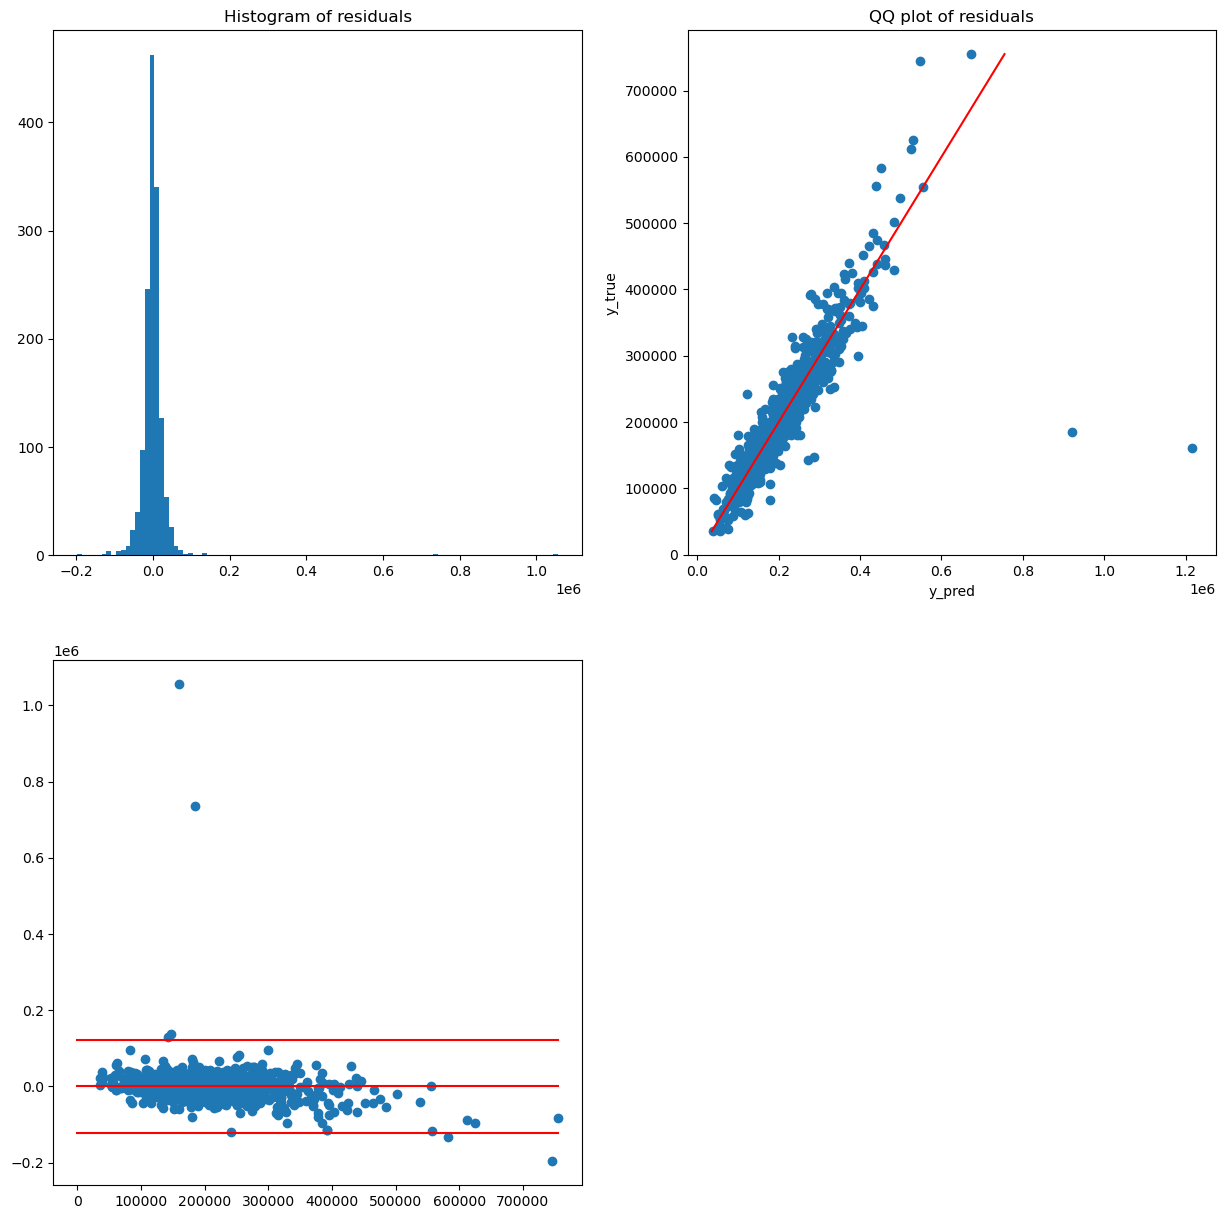

In [32]:
residuals = test_linreg(np.exp(y_pred), y)

In [33]:
(residuals.quantile(0.975) - residuals.quantile(0.025))/residuals.std()

2.295105315745699

There, however, does exist some outliers. Let's examine these.

In [34]:
#Check the outliers
pd.set_option('display.max_columns',1000)
df[residuals > 0.5e6]

,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test,HasGarage,DiffHouseGarageYrs,HasLowGarageDiff,Has2ndFlr,HasLowQualSF,HasVnrArea,ExMaterial,NumBsmtFinType,Bsmt_ALQ_Area,Bsmt_BLQ_Area,Bsmt_GLQ_Area,Bsmt_LwQ_Area,Bsmt_Rec_Area,IsAvgGCond,IsAvgGQual,AvgRmSize
523,0,0,2,0,0,0,0,0,0,60,RL,130.0,40094,Pave,None,1,Bnk,AllPub,Inside,0,Edwards,1Fam,2Story,10,5,2007,2008,Hip,CompShg,Stone,762.0,5,3,PConc,5,3,4,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,5.0,1.0,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,5,11,0.0,1,4,BuiltIn,2007.0,Fin,3.0,884.0,3,3,1.0,208,406,0,0,0,0,0,None,None,0,10,2007,New,Partial,184750.0,train,True,0.0,True,True,False,False,CmentBd+CemntBd,2,0.0,0.0,2260.0,0.0,0.0,True,True,425.090909
1298,0,1,0,0,0,0,0,0,0,60,RL,313.0,63887,Pave,None,3,Bnk,AllPub,Corner,0,Edwards,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stone,796.0,5,3,PConc,5,3,4,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,5.0,1.0,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,0.0,3,4,Attchd,2008.0,Fin,2.0,1418.0,3,3,1.0,214,292,0,0,0,480,4,None,None,0,1,2008,New,Partial,160000.0,train,True,0.0,True,True,False,False,Stucco,2,0.0,0.0,5644.0,0.0,0.0,True,True,470.166667


Let's remove these outliers and then re-run the model

In [35]:
df = df.drop([523,1298],axis=0)

In [36]:
y = df['SalePrice']
X = pd.get_dummies(df.drop('SalePrice',axis=1))

reg = LinearRegression()
y_pred = cross_val_predict(reg, X, np.log(y), cv=5)
mean_absolute_error(np.exp(y_pred), y)

14919.444465040562

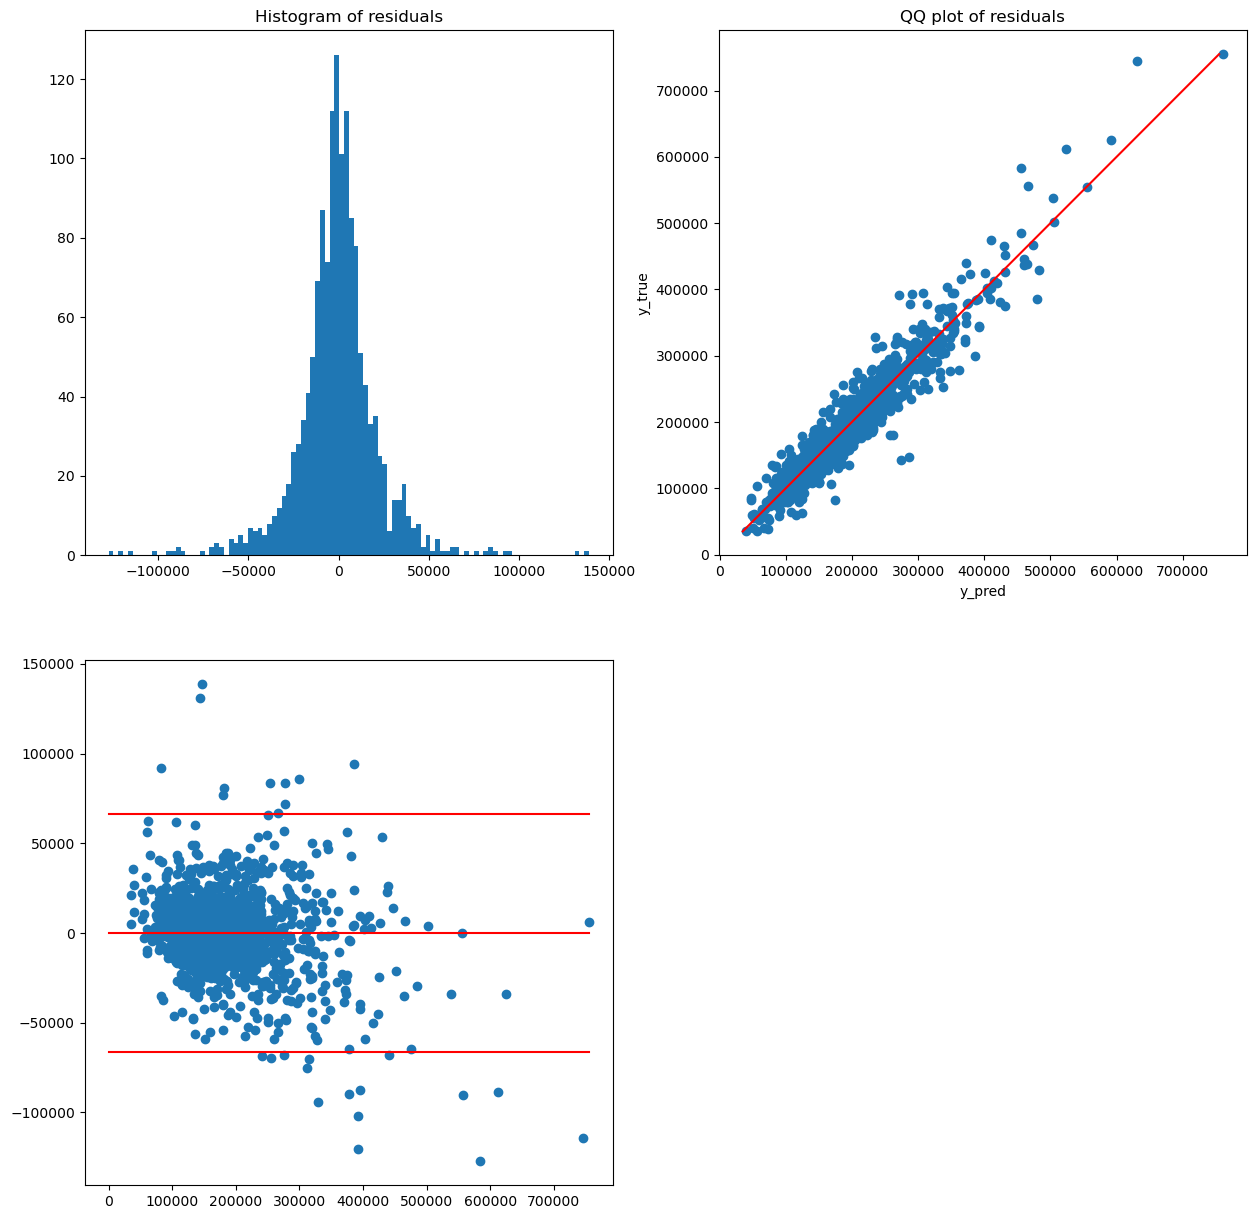

In [37]:
#Check normal distribution of Residuals
import matplotlib.pyplot as plt
residuals = test_linreg(np.exp(y_pred), y)

In [38]:
(residuals.quantile(0.975) - residuals.quantile(0.025))/residuals.std()

4.093080545181037

I'll save a csv file of the last version of the dataset, the one with the SalePrice variable logged and the outliers removed.

In [39]:
df_med = pd.concat([X,np.log(df['SalePrice'])],axis=1)
df_med.to_csv('./Interim Data/logged_outlier_removed.csv',index=False)

## Feature Selection and Regularization

Since there were a lot of redundant and insignificant features, let's see if removing some of those features would help us achieve more accurate results. Here we'll test the below feature selection methods:
- VIF
- Forward Selection
- Backward Selection

As well as some regularization methods:
- Ridge
- Lasso

In [2]:
#Reading in the Data
df_med = pd.read_csv('./Interim Data/logged_outlier_removed.csv').astype('float')

# X and y creation
y = df_med['SalePrice']
X = df_med.drop('SalePrice',axis=1)

### VIF

VIF is a filter feature selection method, which is when a subset of features are selected based on a certain criteria / value (in this case VIF) independent of the exact Machine Learning Algorithm the features will be used in.

VIF (Variance Inflation Factor) is a numerical measurement of a feature's multicollinearity with other features. A larger VIF means the the feature is more correlated with other features and should be dropped, and is a useful metric to filter out intercorrelated metrics, as we have here. As a rule of thumb, VIFs in the 5-20 range or higher are considered signs of multicollinearity and should be removed, though this threshold is arbitrary.

In [41]:
def vif_reduction(x, thresh = 5):
    output = x.copy()
    k = output.columns
    #Collection of vif and column names:
    vif = [(variance_inflation_factor(output.values,i), k[i]) for i in range(len(k))]
    for i, col in vif:
        if i > thresh:
            output = output.drop(col, axis=1)
    return output

for t in list(range(5,20,1)):
    vif_features = vif_reduction(X, thresh = t)
    reg = LinearRegression()
    y_pred = cross_val_predict(reg, vif_features, y, cv=5)
    mae = mean_absolute_error(np.exp(y_pred), np.exp(y))
    print('Threshold = {}, MAE = {}'.format(t,mae))

Threshold = 5, MAE = 26007.986359159724
Threshold = 6, MAE = 21771.401426661643
Threshold = 7, MAE = 21772.27458706283
Threshold = 8, MAE = 20195.440549569656
Threshold = 9, MAE = 20159.151718341767
Threshold = 10, MAE = 20159.151718341767
Threshold = 11, MAE = 20159.151718341767
Threshold = 12, MAE = 20291.08819080517
Threshold = 13, MAE = 20291.08819080517
Threshold = 14, MAE = 20291.08819080517
Threshold = 15, MAE = 20306.60746884162
Threshold = 16, MAE = 20306.60746884162
Threshold = 17, MAE = 20306.60746884162
Threshold = 18, MAE = 20306.60746884162
Threshold = 19, MAE = 20306.60746884162


It seems that the best VIF threshold for linear regression would be 9. Let's look at the columns.

In [42]:
vif_features = vif_reduction(X, thresh = 9)
vif_features.columns

Index(['PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe', 'LotFrontage',
       'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'HasLowGarageDiff', 'HasLowQualSF', 'IsAvgGCond', 'IsAvgGQual',
       'train_test_train'],
      dtype='object')

In [43]:
len(vif_features.columns)

47

Though the final MAE is still higher than which we got using all the features, it is impressive that they are even on the same scale considering that we only retained approximately 1/7 of the features. 

I wonder if we could reduce it more by expanding the VIF threshold beyond 20.

In [44]:
for t in list(range(20,200,20)):
    vif_features = vif_reduction(X, thresh = t)
    reg = LinearRegression()
    y_pred = cross_val_predict(reg, vif_features, y, cv=5)
    mae = mean_absolute_error(np.exp(y_pred), np.exp(y))
    print('Threshold = {}, MAE = {}'.format(t,mae))

Threshold = 20, MAE = 20306.60746884162
Threshold = 40, MAE = 18836.290766040383
Threshold = 60, MAE = 16344.505161420147
Threshold = 80, MAE = 16354.99161740116
Threshold = 100, MAE = 16354.99161740116
Threshold = 120, MAE = 16354.99161740116
Threshold = 140, MAE = 16354.99161740116
Threshold = 160, MAE = 16354.99161740116
Threshold = 180, MAE = 16354.99161740116


In [45]:
vif_features = vif_reduction(X, thresh = 60)
len(vif_features.columns)

58

Looks like we could yield an even lower MAE by increasing the VIF threshold to 60, which would keep 59 out of the 281 original variables. Maybe I will use this reduced version of the dataset instead of the original even though the MAE is higher, considering that the difference isn't that drastic (approximately 12.5% less) and we can be victim to overfitting.

### Forward Selection

Both Forward and Backward Selections are wrapper feature selection methods, which means that features' importances are determined using the output of a certain Machine Learning algorithm. Based on the performance of the model with the selected filters variables are added or removed.

First, we are going to use Forward Selection, which is adding features, from an initial state of 0 features, to a model based on the scoring criteria. It stops when adding new features won't significantly improve the model.

In [46]:
from sklearn.feature_selection import SequentialFeatureSelector
from tqdm import tqdm

feature_selections = []
reg = LinearRegression()

for i in tqdm(range(1,len(X.columns))):
    for_sel = SequentialFeatureSelector(reg,n_features_to_select=i,direction='forward',scoring='neg_mean_absolute_error')
    for_sel_features = for_sel.fit_transform(X,y)
    y_pred = cross_val_predict(reg, for_sel_features, y, cv=5)
    feature_selections.append(mean_absolute_error(np.exp(y_pred), np.exp(y)))
    
print(feature_selections.index(min(feature_selections))+1, min(feature_selections))

100%|█████████████████████████████████████| 279/279 [38:57:30<00:00, 502.69s/it]

78 12432.487841318138


In [50]:
#Let's try re-running this on another set of data

reg = LinearRegression()
sel = SequentialFeatureSelector(reg,n_features_to_select=78,direction='forward',scoring='neg_mean_absolute_error')
X2 = for_sel.fit_transform(X,y)
y_pred = cross_val_predict(reg, X2, y, cv=5)
mean_absolute_error(np.exp(y_pred), np.exp(y))

17609.476774186183

### Backward Elimination

In contrast to Forward Selection, Backward Elimination is removing features, from an initial state when all features are included, from a model based on their lack of significance and improvement in regards to the scoring criteria. 

It stops when removing features won't significantly improve the model.

In [11]:
X=X.drop('train_test_train',axis=1)

In [25]:
newX = pd.DataFrame(X.reset_index(drop=True))
feature_selections = []
for i in range(len(newX.columns),1,-1):
    X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size = 0.3)
    
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    params = lm.coef_
    predictions = lm.predict(X_test)

    MSE = (sum((y_test-predictions)**2))/(len(newX)-len(newX.columns))
    
    var_b = newX.var()/((newX - newX.mean())**2).sum()
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values =2*(1-stats.t.cdf(np.abs(ts_b),newX.shape[0]-1))

    myDF3 = pd.DataFrame({'Coefficients':params, 'Standard Errors': sd_b, 't values':ts_b, 'Probabilities':p_values})
    try:
        feature_selections.append((i, newX.columns, mean_absolute_error(np.exp(predictions),np.exp(y_test))))
    except ValueError:
        feature_selections.append((i, newX.columns, np.inf))
    try:
        newX = newX.drop(myDF3['Probabilities'].idxmax(),axis=1)
    except KeyError:
        break
        
print('The lowest MAE accomplished is {}, with {} parameters'.format(sorted(feature_selections, key=lambda x: x[2])[0][2], sorted(feature_selections, key=lambda x: x[2])[0][0]))

The lowest MAE accomplished is 13256.143339611313, with 273 parameters


In [30]:
reg = LinearRegression()
X2 = X[feature_selections[6][1]]
y_pred = cross_val_predict(reg, X2, y, cv=5)
mean_absolute_error(np.exp(y_pred), np.exp(y))

14943.918501836686

### Regularizations

Both Lasso and Ridge regressions are types of embedded feature selection methods. What this means is that the feature selection is part of the Machine Learning Algorithms.

Laso and Ridge regressions both regularization techniques that add a penalty term to the stadard Linear Regression to penalize large coefficients and to shrink (in Ridge Regression) and remove (Lasso Regression) variables that do not contribute to the model, hence the Feature Selection part of the Alforithms.

First, let's find the hyperparameters for the two regularized regression models. Others have said that normalizing / standardizing the data would work better for these models, so I'm going to be testing both the standardized and non-standardized version of the X values.

In [31]:
#Standarized X values
X_std = StandardScaler().fit_transform(X,y)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size = 0.3)

#Original X values
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size = 0.3)

#### Ridge Regression

First let's try the non-standardized version. I wrote a function to automate the hyperparameter tuning for the alpha to prevent having to manually adjust the range myself.

In [32]:
#Definind the Find Alpha Function

def alpha_find(model, is_std, min_value = 0.001,
        max_value = 0.01,
        max_round = 2,
        step = 0.001):
    #Keep expanding the range until told to stop.
    param_candidates = []
    while 1 == 1:
        alpha = np.arange(min_value, max_value, step)
        param_grid = {'alpha': alpha}

        model_cv = GridSearchCV(model,param_grid,cv=5)
        
        #If is_std = True, use the standardized dataset. Else use the original
        if is_std == True:
            X_train, y_train = X_train_std, y_train_std
        else:
            X_train, y_train = X_train_orig, y_train_orig
        model_cv.fit(X_train,y_train)

        best_alpha = model_cv.best_params_['alpha']
        
        #In case of borderline values, if best_alpha's been seen before then use that.
        if best_alpha in param_candidates:
            break
        else:
            param_candidates.append(best_alpha)
        
        #If best_param = max value, then expand range. If min value, reduce range. Else break.
        if (round(best_alpha, max_round) == max_value):
            min_value, max_value, step, max_round = min_value*10, max_value*10, step*10, max_round-1
        elif ((best_alpha) == min_value):
            min_value, max_value, step, max_round = min_value/10, max_value/10, step/10, max_round+1
        else:
            break
    print('Best Alpha for Model (Standarized = {}): '.format(is_std),model_cv.best_params_)    

In [33]:
#Define Ridge Model
rig = Ridge()

#Standarized
alpha_find(rig,True)

#Non-Standardized
alpha_find(rig,False)

Best Alpha for Model (Standarized = True):  {'alpha': 200.0}
Best Alpha for Model (Standarized = False):  {'alpha': 20.0}


With our hyperparameters, let's try fitting the model with the data and see what we get.

In [34]:
#Standardized
rig = Ridge(alpha=200)
y_pred = cross_val_predict(rig, X_std, y, cv=5)
print('Standardized Dataset: ', mean_absolute_error(np.exp(y_pred), np.exp(y)))

Standardized Dataset:  14003.44604788576


In [35]:
#Non-Standardized
rig = Ridge(alpha=20)
y_pred = cross_val_predict(rig, X, y, cv=5)
print('Original Dataset: ', mean_absolute_error(np.exp(y_pred), np.exp(y)))

Original Dataset:  13799.818631515116


Non-standardized was a little better, but both were lower than our previous lowest MAE (14914.91). Now let's try Lasso.

#### Lasso

Similar to Ridge, let's first find the appropriate hyperparameters for Lasso.

In [36]:
lasso = Lasso()

alpha_find(lasso, is_std=True)
alpha_find(lasso, is_std=False)

Best Alpha for Model (Standarized = True):  {'alpha': 0.003}
Best Alpha for Model (Standarized = False):  {'alpha': 0.0005}


Now the we have the hyperparameters, let's run the model and see what we get.

In [37]:
#Standardized
las = Lasso(alpha=0.003)
y_pred = cross_val_predict(las, X_std, y, cv=5)
print('Standardized Dataset: ', mean_absolute_error(np.exp(y_pred), np.exp(y)))

Standardized Dataset:  13457.356403734755


In [38]:
#Original
las = Lasso(alpha=0.0005)
y_pred = cross_val_predict(las, X, y, cv=5)
print('Non-Standardized Dataset: ', mean_absolute_error(np.exp(y_pred), np.exp(y)))

Non-Standardized Dataset:  13720.133069168822


The results were better than 14915.91 and were also better than Ridge. Looks like the standardized dataset yielded a bit of a better result for Lasso compared to Ridge. 

Lasso is known to double as a feature selector, since it reduces the coefficients of insignificant variables to 0. Let's take a look at what variables were deemed important.

In [39]:
#Let's also look at what variables Lasso deemed most important.
lasso_coef = las.fit(X,y).coef_
len([coef for coef in lasso_coef if coef != 0])

110

In [40]:
var_coef = pd.DataFrame({'Variable':X.columns,'Coefficent':lasso_coef})
var_coef = var_coef[var_coef['Coefficent']!=0].sort_values('Coefficent')
var_coef

,Variable,Coefficent
76,MSZoning_C (all),-0.292554
80,MSZoning_RM,-0.057967
107,Neighborhood_MeadowV,-0.046208
213,SaleCondition_Abnorml,-0.044152
42,Functional,-0.034087
...,...,...
210,SaleType_New,0.048173
14,OverallQual,0.050550
229,ExMaterial_BrkFace+Wd Sdng,0.053608
119,Neighborhood_StoneBr,0.058866
